In [61]:
import pandas as pd
import numpy as np

from numpy import array

import matplotlib.pyplot as plt

import statsmodels.api as sm

In [73]:
training_data_name = "tiling"

In [89]:
genome_df_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/yeast_chrV_1bpresolution_subsequence50.csv")

In [90]:
genome_df_chrV

,sequence,chrID,position
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4
...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823


In [75]:
# genome_df_chrV = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/chrV_ir_lstm_cn_{training_data_name}_post_smoothed_matched.csv")

In [91]:
cn_avg_pred_df = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_yeast_chrV_1bpresolution_subsequence50_predictions.csv")

In [92]:
cn_avg_pred_df.mean(numeric_only=True)

n=26            -0.000199
n=29            -0.010982
n=31            -0.011115
n=26_reverse     0.031097
n=29_reverse     0.023302
n=31_reverse     0.034720
n=26_comp        0.030704
n=29_comp        0.023764
n=31_comp        0.034528
n=26_rev_comp    0.000262
n=29_rev_comp   -0.009915
n=31_rev_comp   -0.011192
C0              -0.004390
dtype: float64

In [93]:
cn_avg_pred_df.std(numeric_only=True)

n=26             0.894530
n=29             0.905077
n=31             0.914870
n=26_reverse     0.865536
n=29_reverse     0.879328
n=31_reverse     0.887255
n=26_comp        0.865285
n=29_comp        0.878724
n=31_comp        0.886794
n=26_rev_comp    0.893233
n=29_rev_comp    0.904660
n=31_rev_comp    0.915054
C0               0.706127
dtype: float64

In [94]:
genome_df_chrV = pd.concat([genome_df_chrV, cn_avg_pred_df], axis=1)

In [95]:
tiling_C26_mean = -0.1702373294847514 
tiling_C26_std = 0.5761561889426974
genome_df_chrV["n=26"] = genome_df_chrV["n=26"]*tiling_C26_std + tiling_C26_mean

In [96]:
tiling_C29_mean = -0.1730189136679293 
tiling_C29_std = 0.5889335849536195
genome_df_chrV["n=29"] = genome_df_chrV["n=29"]*tiling_C29_std + tiling_C29_mean

In [97]:
tiling_C31_mean = -0.20523567238490675 
tiling_C31_std = 0.6526103123263609
genome_df_chrV["n=31"] = genome_df_chrV["n=31"]*tiling_C31_std + tiling_C31_mean

In [85]:
genome_df_chrV["smooth_C26"].std()

0.3931679947020196

In [86]:
# # half_region_size = 10
half_region_size = 5
# C26_amp_estimates = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"]) - 
#                             min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"]))/2 
#                             for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size):
#     C26_amp_estimates.append(np.nan)
#     C26_amp_estimates.insert(0,np.nan)

# C26_amp_estimates = array(C26_amp_estimates)

In [87]:
# C26_amp_estimates2 = [max((abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"].values -
#                                genome_df_chrV.loc[(i-half_region_size*2):i, "n=26"].values) + 
#                            abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"].values -
#                                genome_df_chrV.loc[i:(i+half_region_size*2), "n=26"].values))/4)
#                       for i in range(half_region_size*2, genome_df_chrV.shape[0]-half_region_size*2)]

C26_amp_estimates2 = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"]) - 
                       min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"]))/2
                       for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size*2):
for i in range(half_region_size):
    C26_amp_estimates2.append(np.nan)
    C26_amp_estimates2.insert(0,np.nan)

C26_amp_estimates2 = array(C26_amp_estimates2)

KeyError: 'n=26'

In [44]:
# C26_rev_comp_amp_estimates2 = [max((abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26_rev_comp"].values -
#                                genome_df_chrV.loc[(i-half_region_size*2):i, "n=26_rev_comp"].values) + 
#                            abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26_rev_comp"].values -
#                                genome_df_chrV.loc[i:(i+half_region_size*2), "n=26_rev_comp"].values))/4)
#                       for i in range(half_region_size*2, genome_df_chrV.shape[0]-half_region_size*2)]

C26_rev_comp_amp_estimates2 = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26_rev_comp"]) - 
                       min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26_rev_comp"]))/2
                       for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size*2):
for i in range(half_region_size):
    C26_rev_comp_amp_estimates2.append(np.nan)
    C26_rev_comp_amp_estimates2.insert(0,np.nan)

C26_rev_comp_amp_estimates2 = array(C26_rev_comp_amp_estimates2)

In [45]:
# # half_region_size = 10
# half_region_size = 5
# C26_amp_estimates = array([max(abs(genome_df_chrV.loc[(i-half_region_size):i, "n=26"].values - 
#                                    genome_df_chrV.loc[i:(i+half_region_size), "n=26"].values))/2 
#                                    for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)])

In [46]:
# C26_smooth_amp_estimates1 = [max(abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"].values - 
#                                           genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "smooth_10.4bp_C26"].values)) 
#                                           for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]
# C26_smooth_amp_estimates2 = [np.mean(abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=26"].values - 
#                                           genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "smooth_10.4bp_C26"].values)) 
#                                           for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]
# for i in range(half_region_size):
#     C26_smooth_amp_estimates1.append(np.nan)
#     C26_smooth_amp_estimates1.insert(0,np.nan)

#     C26_smooth_amp_estimates2.append(np.nan)
#     C26_smooth_amp_estimates2.insert(0,np.nan)

# C26_smooth_amp_estimates1 = array(C26_smooth_amp_estimates1)
# C26_smooth_amp_estimates2 = array(C26_smooth_amp_estimates2)

In [47]:
C29_amp_estimates2 = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=29"]) - 
                       min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=29"]))/2
                       for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size*2):
for i in range(half_region_size):
    C29_amp_estimates2.append(np.nan)
    C29_amp_estimates2.insert(0,np.nan)

C29_amp_estimates2 = array(C29_amp_estimates2)

In [48]:
# C31_amp_estimates = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"]) - 
#                             min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"]))/2 
#                             for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size):
#     C31_amp_estimates.append(np.nan)
#     C31_amp_estimates.insert(0,np.nan)

# C31_amp_estimates = array(C31_amp_estimates)

In [49]:
# C31_amp_estimates2 = [max((abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"].values -
#                                genome_df_chrV.loc[(i-half_region_size*2):i, "n=31"].values) + 
#                            abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"].values -
#                                genome_df_chrV.loc[i:(i+half_region_size*2), "n=31"].values))/4)
#                       for i in range(half_region_size*2, genome_df_chrV.shape[0]-half_region_size*2)]

C31_amp_estimates2 = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"]) - 
                       min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"]))/2
                       for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size*2):
for i in range(half_region_size):
    C31_amp_estimates2.append(np.nan)
    C31_amp_estimates2.insert(0,np.nan)

C31_amp_estimates2 = array(C31_amp_estimates2)

In [50]:
# C31_rev_comp_amp_estimates2 = [max((abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31_rev_comp"].values -
#                                genome_df_chrV.loc[(i-half_region_size*2):i, "n=31_rev_comp"].values) + 
#                            abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31_rev_comp"].values -
#                                genome_df_chrV.loc[i:(i+half_region_size*2), "n=31_rev_comp"].values))/4)
#                       for i in range(half_region_size*2, genome_df_chrV.shape[0]-half_region_size*2)]

C31_rev_comp_amp_estimates2 = [(max(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31_rev_comp"]) - 
                       min(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31_rev_comp"]))/2
                       for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size*2):
for i in range(half_region_size):
    C31_rev_comp_amp_estimates2.append(np.nan)
    C31_rev_comp_amp_estimates2.insert(0,np.nan)

C31_rev_comp_amp_estimates2 = array(C31_rev_comp_amp_estimates2)

In [51]:
# C31_amp_estimates = array([max(abs(genome_df_chrV.loc[(i-half_region_size):i, "n=31"].values - 
#                                    genome_df_chrV.loc[i:(i+half_region_size), "n=31"].values))/2 
#                                    for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)])

In [52]:
# C31_smooth_amp_estimates1 = [max(abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"].values - 
#                                           genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "smooth_10.4bp_C31"].values)) 
#                                           for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]
# C31_smooth_amp_estimates2 = [np.mean(abs(genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "n=31"].values - 
#                                           genome_df_chrV.loc[(i-half_region_size):(i+half_region_size), "smooth_10.4bp_C31"].values)) 
#                                           for i in range(half_region_size, genome_df_chrV.shape[0]-half_region_size)]

# for i in range(half_region_size):
#     C31_smooth_amp_estimates1.append(np.nan)
#     C31_smooth_amp_estimates1.insert(0,np.nan)

#     C31_smooth_amp_estimates2.append(np.nan)
#     C31_smooth_amp_estimates2.insert(0,np.nan)

# C31_smooth_amp_estimates1 = array(C31_smooth_amp_estimates1)
# C31_smooth_amp_estimates2 = array(C31_smooth_amp_estimates2)

In [53]:
# C26_C31_amp_ratio = C26_amp_estimates/C31_amp_estimates
C26_C31_amp_ratio2 = C26_amp_estimates2/C31_amp_estimates2
C26_C31_rev_comp_amp_ratio2 = C26_rev_comp_amp_estimates2/C31_rev_comp_amp_estimates2
# C26_C31_smooth_amp_ratio1 = C26_smooth_amp_estimates1/C31_smooth_amp_estimates1
# C26_C31_smooth_amp_ratio2 = C26_smooth_amp_estimates2/C31_smooth_amp_estimates2

In [54]:
np.mean(C26_C31_amp_ratio2)

nan

In [55]:
print(f"Predicted Cn Full ChrV mean Amp(C26)/Amp(C31): {round(np.mean(C26_C31_amp_ratio2[5:(len(C26_C31_amp_ratio2)-5)]), 3)}")
print(f"Predicted C26 Full ChrV mean, std: {round(np.mean(genome_df_chrV['n=26']), 3)}, {round(np.std(genome_df_chrV['n=26']), 3)}")
print(f"Predicted C29 Full ChrV mean, std: {round(np.mean(genome_df_chrV['n=29']), 3)}, {round(np.std(genome_df_chrV['n=29']), 3)}")
print(f"Predicted C31 Full ChrV mean, std: {round(np.mean(genome_df_chrV['n=31']), 3)}, {round(np.std(genome_df_chrV['n=31']), 3)}")
print(f"Predicted Cn Full ChrV mean Amp(C26): {round(np.mean(C26_amp_estimates2[5:(len(C26_amp_estimates2)-5)]), 3)}")
print(f"Predicted Cn Full ChrV mean Amp(C29): {round(np.mean(C29_amp_estimates2[5:(len(C29_amp_estimates2)-5)]), 3)}")
print(f"Predicted Cn Full ChrV mean Amp(C31): {round(np.mean(C31_amp_estimates2[5:(len(C31_amp_estimates2)-5)]), 3)}")

Predicted Cn Full ChrV mean Amp(C26)/Amp(C31): 0.771
Predicted C26 Full ChrV mean, std: -0.17, 0.515
Predicted C29 Full ChrV mean, std: -0.179, 0.533
Predicted C31 Full ChrV mean, std: -0.212, 0.597
Predicted Cn Full ChrV mean Amp(C26): 0.452
Predicted Cn Full ChrV mean Amp(C29): 0.55
Predicted Cn Full ChrV mean Amp(C31): 0.602


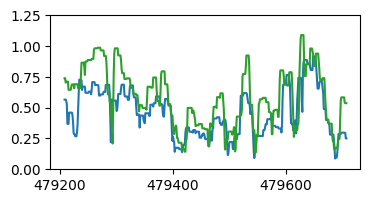

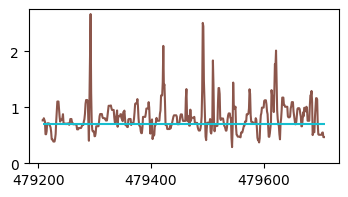

In [59]:
# sequence_length = 200
# sequence_length = 100
sequence_length = 500

# starting_point = 31259
# starting_point = 516127
# starting_point = 479158
# starting_point = np.random.randint(genome_df_chrV.shape[0]-sequence_length)

# starting_point = 250691 # Region on Slides
# # starting_point = 479158 # Region for Paper?
starting_point = 479208 # Region for Paper?

plt.figure(figsize=(4,2))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_amp_estimates[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude", color="C2")

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C26_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C26", color="C0")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C31_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C31", color="C2")

plt.ylim((0, 1.25))
plt.locator_params(axis='x', nbins=5)
# plt.ylim((0, 1))
# plt.legend(fontsize="small")
plt.show()

# plt.figure(figsize=(4,2))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_rev_comp_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C26 reverse complement", 
#          color="C0", linestyle="dashed")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C31_rev_comp_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C31 reverse complement", 
#          color="C2", linestyle="dashed")

# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C26_smooth_amp_estimates1[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude Estimate", color="C0")
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C31_smooth_amp_estimates1[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude Estimate", color="C2")

# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C26_smooth_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C26 Amplitude Estimate", color="C0")
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C31_smooth_amp_estimates2[range(starting_point, starting_point + sequence_length)], label="C31 Amplitude Estimate", color="C2")

# # plt.ylim((0, 2.5))
# plt.ylim((0, 2))
# plt.locator_params(axis='x', nbins=5)
# # plt.ylim((0, 1))
# # plt.legend(fontsize="small")
# plt.show()


plt.figure(figsize=(4,2))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_C31_amp_ratio[range(starting_point, starting_point + sequence_length)], label="C26/C31 Amplitude Ratio")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         C26_C31_amp_ratio2[range(starting_point, starting_point + sequence_length)], label="C26/C31 Amplitude Ratio", color="C5")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_C31_rev_comp_amp_ratio2[range(starting_point, starting_point + sequence_length)], label="C26/C31 Amplitude Ratio", 
#          color="C5", linestyle="dashed")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_C31_smooth_amp_ratio1[range(starting_point, starting_point + sequence_length)], label="Ratio C26/C31 Amplitude Estimates", color="C4")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_C31_smooth_amp_ratio2[range(starting_point, starting_point + sequence_length)], label="Ratio C26/C31 Amplitude Estimates", color="C5")
plt.hlines(0.7, starting_point, starting_point + sequence_length, label="Estimated Ratio", color="C9")

plt.ylim((0, 2.75))
# plt.ylim((0, 2))
plt.locator_params(axis='x', nbins=5)
# plt.legend(fontsize="small")
plt.show()




# plt.figure(figsize=(6,3))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2")

# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=0.5)
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=0.5)
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          genome_df_chrV["smooth_10.4bp_C26"][range(starting_point, starting_point + sequence_length)], label="Smooth C26", color="C0")
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          genome_df_chrV["smooth_10.4bp_C31"][range(starting_point, starting_point + sequence_length)], label="Smooth C31", color="C2")

# # plt.legend()
# plt.show()




/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


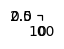

<Figure size 1400x200 with 0 Axes>

In [24]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line1, = ax.plot(x,y, color="C0")
line2, = ax.plot(x,y, color="C2")

legendFig.legend([line1, line2], 
                 ["C26", "C31"], ncols=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(14)
legendFig.savefig('legend.png')

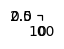

<Figure size 1400x200 with 0 Axes>

In [38]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line5, = ax.plot(x,y, color="C5")
line7, = ax.plot(x,y, color="C9")
legendFig.legend([line5, line7], 
                 ["A26/A31", "A26/A31=0.7"], ncols=1)
legendFig.set_figheight(2)
legendFig.set_figwidth(14)
legendFig.savefig('legend.png')

In [18]:
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C26_C31_amp_ratio[range(starting_point, starting_point + sequence_length)], label="C26/C31 Amplitude Ratio")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          C26_C31_amp_ratio2[range(starting_point, starting_point + sequence_length)], label="C26/C31 Amplitude Ratio", color="C4")
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C26_C31_smooth_amp_ratio1[range(starting_point, starting_point + sequence_length)], label="Ratio C26/C31 Amplitude Estimates", color="C4")
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          C26_C31_smooth_amp_ratio2[range(starting_point, starting_point + sequence_length)], label="Ratio C26/C31 Amplitude Estimates", color="C5")
# plt.hlines(0.7, starting_point, starting_point + sequence_length, label="Estimated Ratio", color="C3")

# # plt.ylim((0, 2.5))
# plt.ylim((0, 2))
# plt.legend()
# plt.show()

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=0.5)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=0.5)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C26"][range(starting_point, starting_point + sequence_length)], label="Smooth C26", color="C0")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C31"][range(starting_point, starting_point + sequence_length)], label="Smooth C31", color="C2")

# plt.legend()
# plt.show()

In [19]:
starting_point

479158

In [20]:
print(np.mean(C26_C31_amp_ratio2[10:(len(C26_C31_amp_ratio2)-10)]), np.mean(C26_C31_smooth_amp_ratio[5:]))

NameError: name 'C26_C31_smooth_amp_ratio' is not defined

In [ ]:
print(np.std(C26_C31_amp_ratio2[10:(len(C26_C31_amp_ratio2)-10)]), np.std(C26_C31_smooth_amp_ratio[5:]))

0.23666855849191631 nan


In [ ]:
C26_C31_amp_ratio2[10]

1.3795739449046593

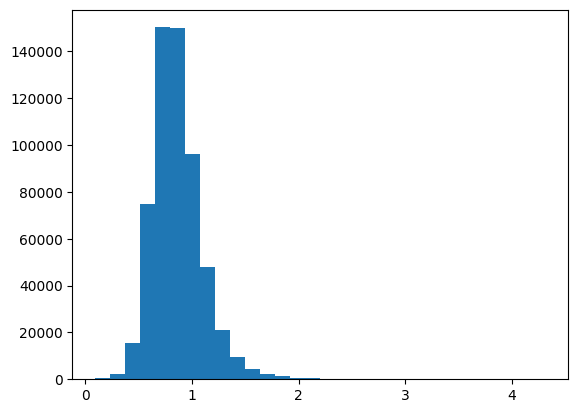

In [ ]:
plt.hist(C26_C31_amp_ratio2, bins=30)
plt.show()

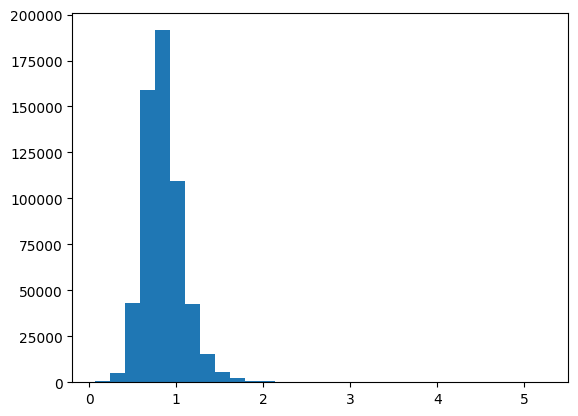

In [ ]:
plt.hist(C26_C31_smooth_amp_ratio, bins=30)
plt.show()

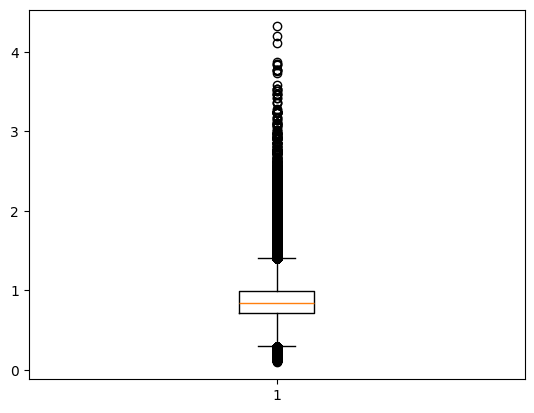

In [ ]:
plt.boxplot(C26_C31_amp_ratio2[10:(len(C26_C31_amp_ratio2)-10)])
plt.show()

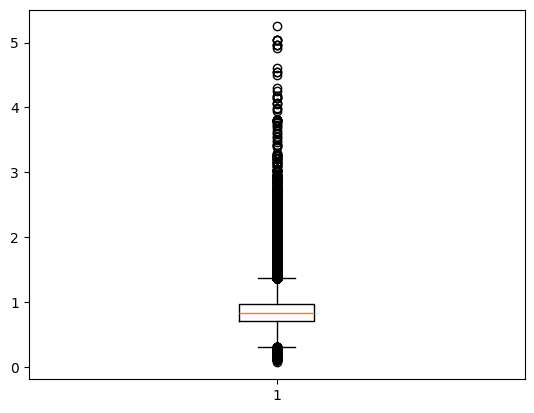

In [ ]:
plt.boxplot(C26_C31_smooth_amp_ratio[5:])
plt.show()